# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (Func, Source, Est, PlotType)
from lib import (stack, fpoints, fcurve, curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    mean = Func.CUMU_MEAN.apply(ar)
    ar1_mean = Func.AR1_OFFSET_MEAN.apply(ar, φ=φ, μ=μ)
    fcurve(data=mean, func=ar1_mean, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    sd = Func.CUMU_SD.apply(ar)
    ar1_sd = Func.AR1_OFFSET_SD.apply(ar, φ=φ, σ=σ)
    fcurve(data=sd, func=ar1_sd, title_offset=1.025, plot_type=PlotType.XLOG)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)

## Simulation $\varphi$ Scan

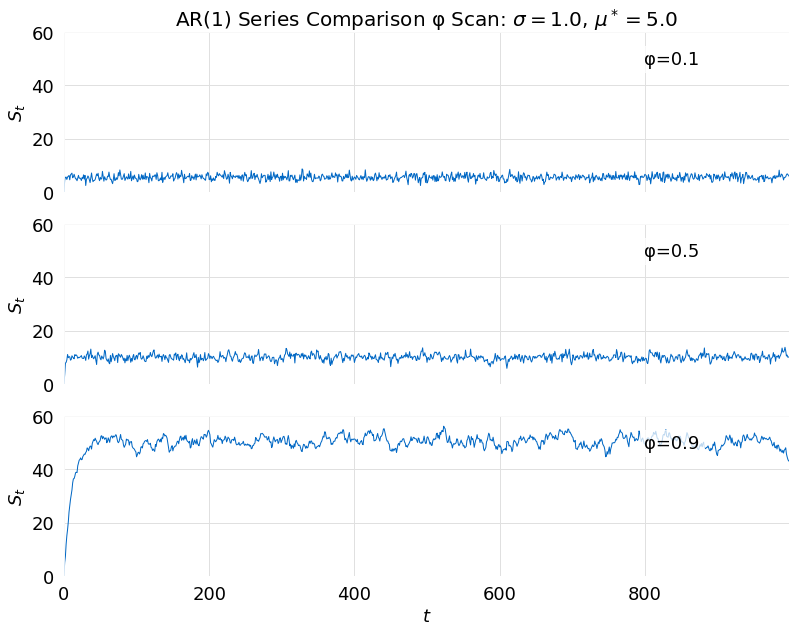

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: $σ={{{σ}}}$, $μ^*={{{μ}}}$"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

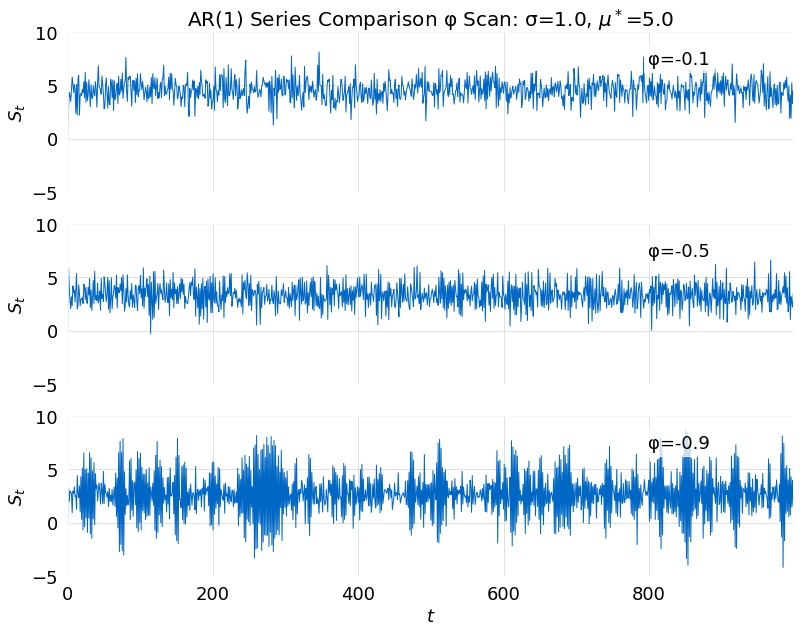

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

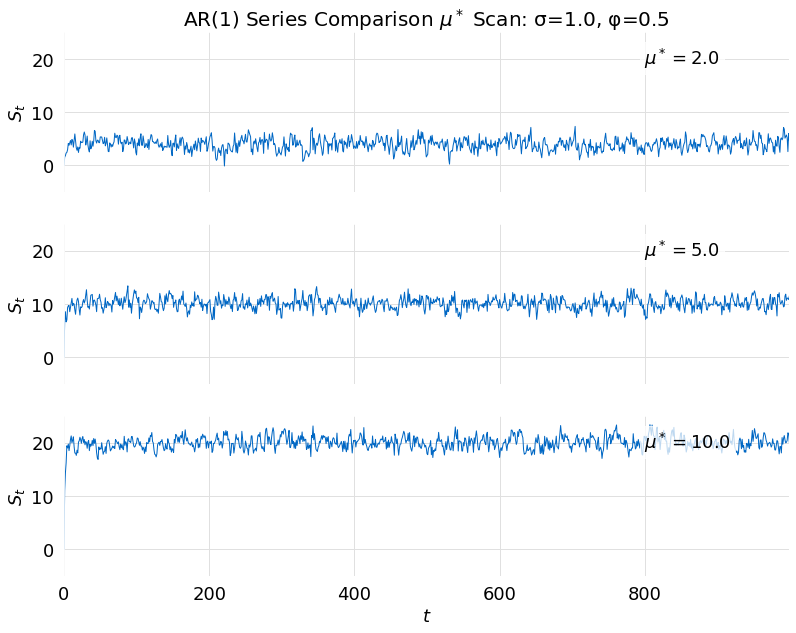

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

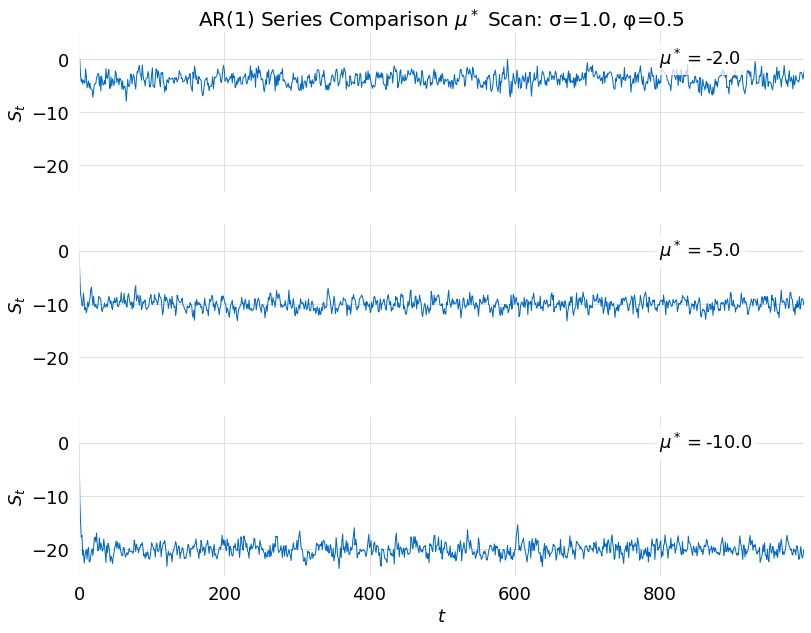

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

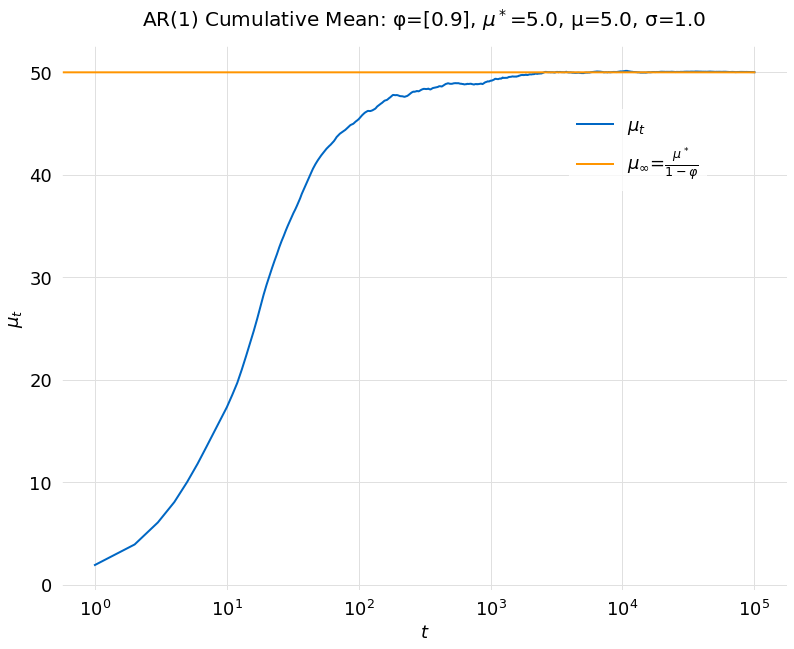

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

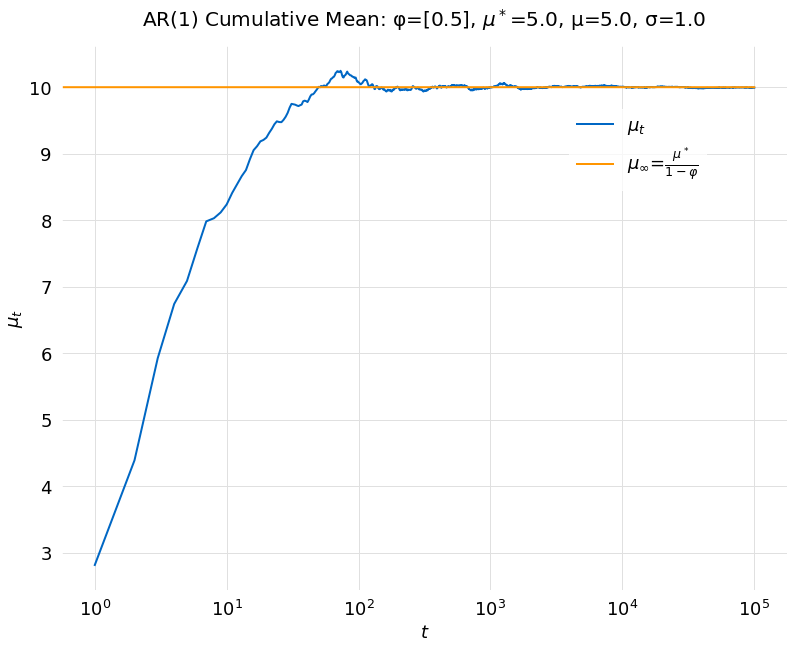

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

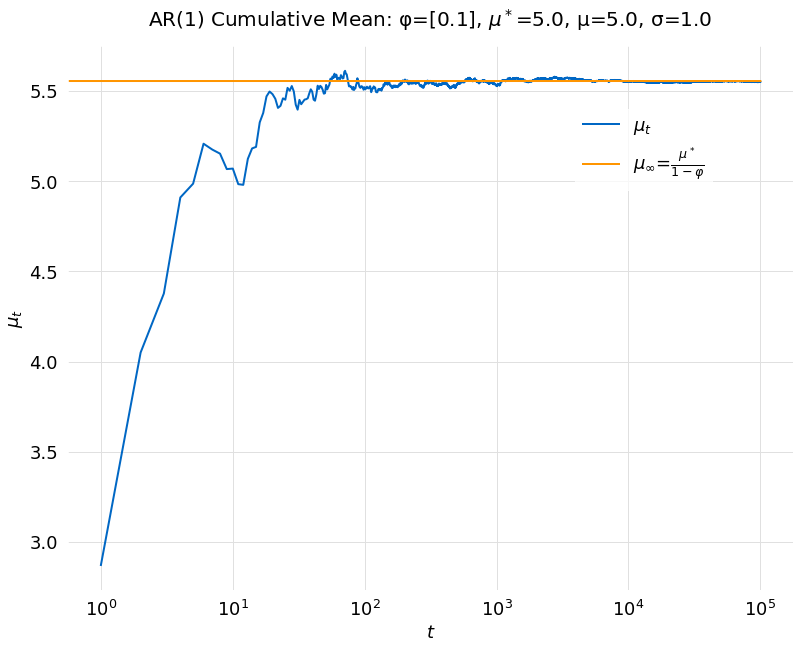

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

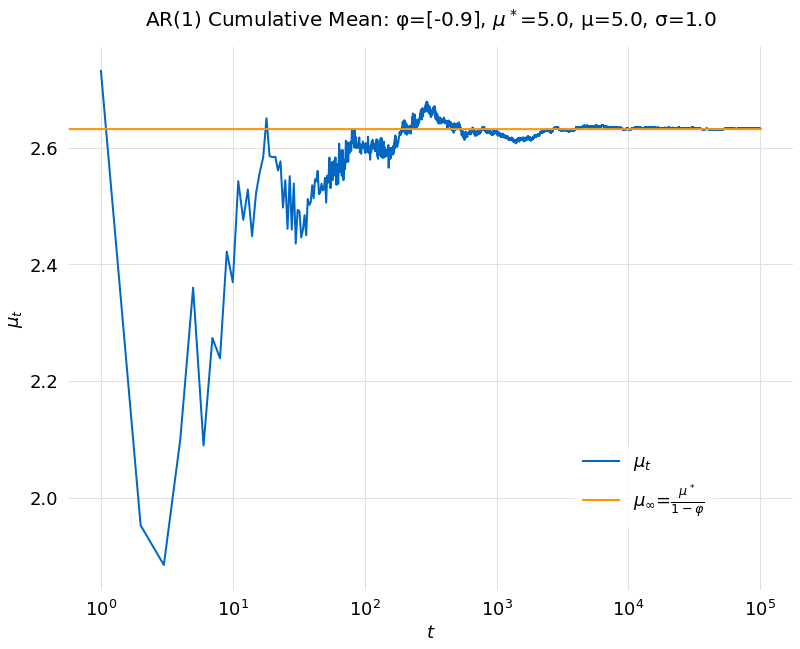

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

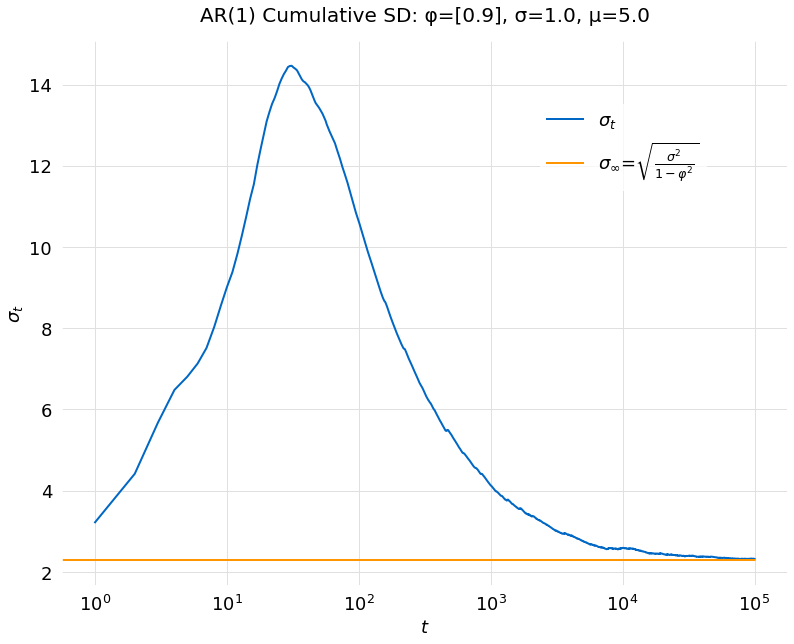

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

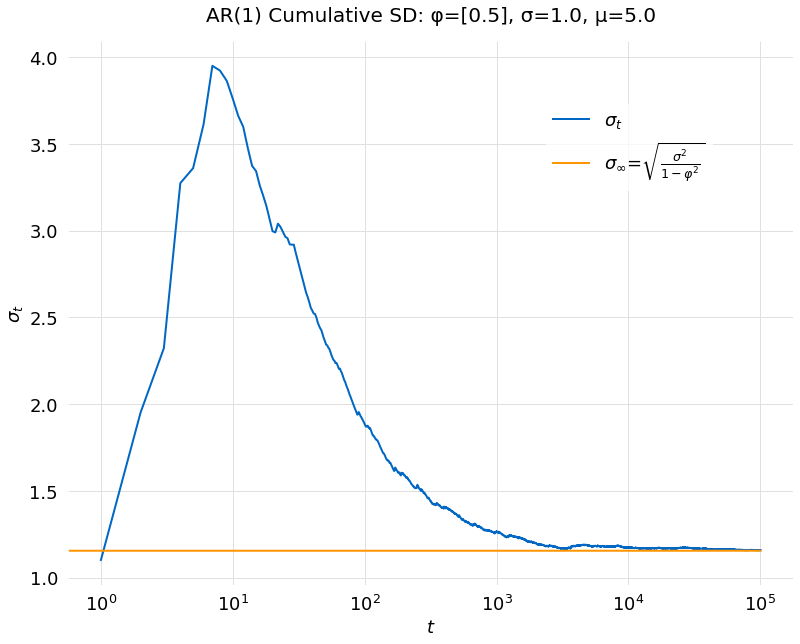

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

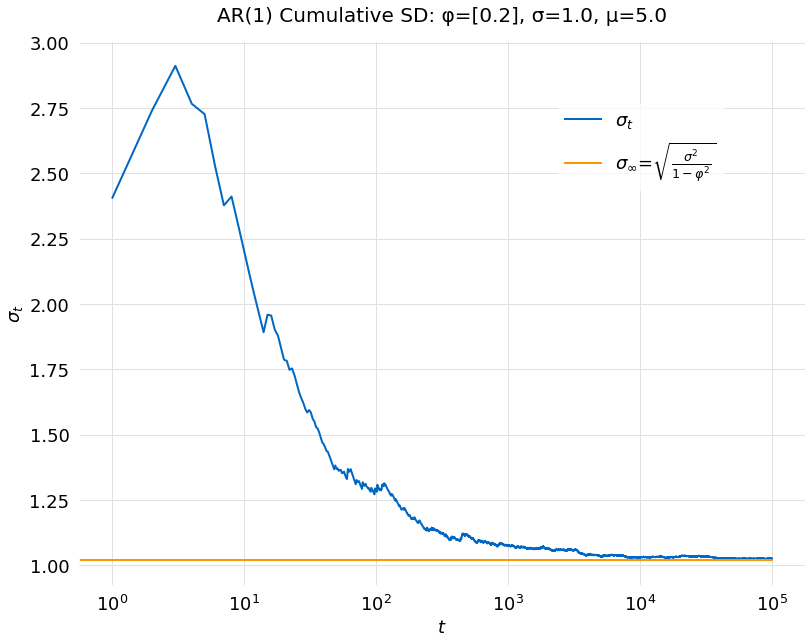

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

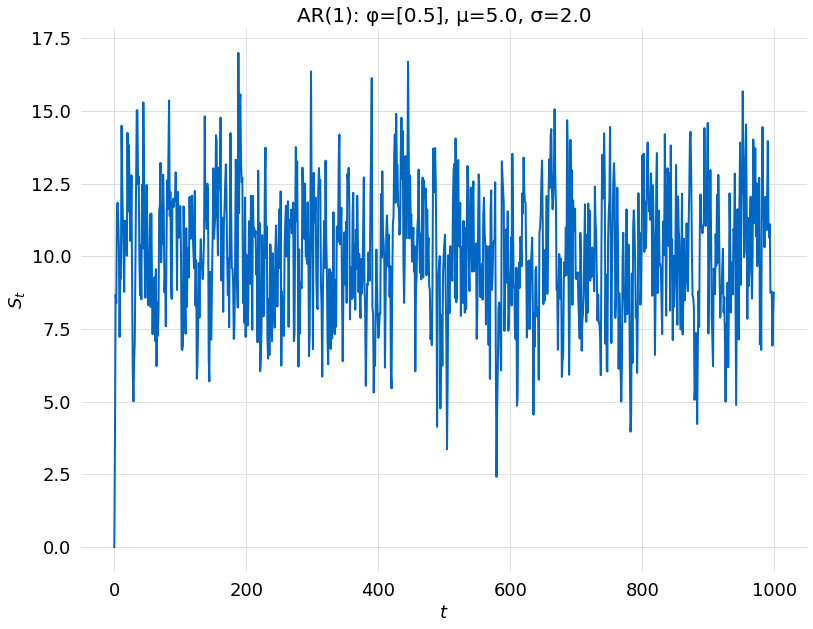

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [15]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

AttributeError: 'MetaData' object has no attribute 'data'

In [ ]:
df.attrs

In [ ]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [ ]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

In [ ]:
df.attrs

In [ ]:
φ = -0.5
μ = 5.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [ ]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

In [ ]:
df.attrs